# ASSIGNMENT

LILIYA PONNU SHAJI -
21BDA38

QS1) Have you come across Grid Search Cross Validation? Fit any two models covered in previous classes and optimize them using Grid search CV.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = datasets.load_iris()

In [5]:
X, y = iris.data, iris.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 18).fit(X_train, y_train)

In [8]:
prediction = clf.predict(X_test)

In [9]:
confusion_matrix(y_test, prediction)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

In [10]:
accuracy_score(y_test, prediction)

0.98

In [11]:
f1_score(y_test,prediction, average="micro")

0.98

In [12]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [13]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [14]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 18}

In [15]:
clf = RandomForestClassifier(n_estimators = 200, max_depth=4, max_features='sqrt' , random_state = 18).fit(X_train, y_train)

In [16]:
prediction = clf.predict(X_test)

In [17]:
confusion_matrix(y_test, prediction)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

In [18]:
accuracy_score(y_test, prediction)

0.98

In [19]:
f1_score(y_test,prediction, average="micro")

0.98

In [20]:
clf = DecisionTreeClassifier(random_state=0)

In [21]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
prediction = clf.predict(X_test)

In [23]:
confusion_matrix(y_test, prediction)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]], dtype=int64)

In [24]:
accuracy_score(y_test, prediction)

0.96

In [25]:
f1_score(y_test,prediction, average="micro")

0.96

In [26]:
grid = { 
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,12,14],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [27]:
rf_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 12, 14],
                         'max_features': ['sqrt', 'log2'], 'random_state': [18],
                         'splitter': ['best', 'random']})

In [28]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'random_state': 18,
 'splitter': 'random'}

In [29]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features='sqrt', splitter='random' , random_state=18)

In [30]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=18,
                       splitter='random')

In [31]:
prediction = clf.predict(X_test)

In [32]:
confusion_matrix(y_test, prediction)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

In [33]:
accuracy_score(y_test, prediction)

0.98

In [34]:
f1_score(y_test,prediction, average="micro")

0.98

Qs2) Fit a CNN model on the dataset which has been assigned to you. Print a classification report to see the model metrics on train and test datasets.

In [35]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [46]:
df= pd.read_csv("C:/Users/Admin/Downloads/archive (4)/targets.csv")
image_path = "C:/Users/Admin/Downloads/archive (4)/images/content/images"

In [47]:
df.head()

,Unnamed: 0,filename,sides,bg_color,fg_color,bound_circle_x,bound_circle_y,bound_circle_r,rotation
0,0,70aaa621-1345-4541-a954-ee9856daaf18.png,4,blue,pink,29,39,15,185
1,1,ea0d8d14-596a-4365-b007-6325fc96e0f4.png,3,black,yellow,66,66,21,215
2,2,48c1fc5a-8b6b-4555-bb6a-a7d42a5cedc2.png,4,yellow,red,59,103,20,59
3,3,ad721906-604c-4682-ae5d-15539ef1dbc7.png,3,green,pink,65,66,61,272
4,4,510dd5ea-fb92-432e-91cc-ed4654a03ebd.png,6,white,green,48,56,42,38


In [48]:
df.describe()

,Unnamed: 0,sides,bound_circle_x,bound_circle_y,bound_circle_r,rotation
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4.500800,64.092100,63.947600,38.060100,181.480200
std,2886.89568,1.120859,15.520287,15.541886,16.412051,104.755179
min,0.00000,3.000000,17.000000,15.000000,10.000000,0.000000
25%,2499.75000,4.000000,57.000000,57.000000,23.000000,91.000000
50%,4999.50000,4.000000,64.000000,64.000000,38.000000,184.000000
75%,7499.25000,6.000000,71.000000,71.000000,52.000000,272.000000
max,9999.00000,6.000000,113.000000,112.000000,66.000000,360.000000


In [49]:
# Function nºsides --> name of the figure (Consider only real cases)
def figure_name(sides):
    if sides==3:
        return "Triangle"
    elif sides==4:
        return "Square"
    elif sides==5:
        return "Pentagon"
    else:
        return "Hexagon"

In [50]:
df["figures"] = df["sides"].map(lambda x: figure_name(x))

In [51]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
training_data = data_generator.flow_from_dataframe(
                    dataframe=df,
                    directory=image_path,
                    y_col='figures',
                    target_size=(128, 128),
                    subset="training"
                )
val_data = data_generator.flow_from_dataframe(
                    dataframe=df,
                    directory=image_path,
                    y_col='figures',
                    target_size=(128, 128),
                    subset="validation"
                )

Found 8000 validated image filenames belonging to 4 classes.
Found 2000 validated image filenames belonging to 4 classes.


In [52]:
training_data.class_indices

{'Hexagon': 0, 'Pentagon': 1, 'Square': 2, 'Triangle': 3}

# Create the model

In [53]:
from keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation="relu",
                        input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(300,activation="relu"))
model.add(layers.Dense(200,activation="relu"))
model.add(layers.Dense(4,activation="softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             metrics=tf.keras.metrics.CategoricalAccuracy())

# Fit the model

In [55]:
history=model.fit(training_data,
                   epochs=5,
                   validation_data=val_data)

Epoch 1/5
250/250 [==============================] - 100s 400ms/step - loss: 0.6655 - categorical_accuracy: 0.7016 - val_loss: 0.5675 - val_categorical_accuracy: 0.7570
Epoch 2/5
250/250 [==============================] - 99s 395ms/step - loss: 0.3979 - categorical_accuracy: 0.8266 - val_loss: 0.4493 - val_categorical_accuracy: 0.8070
Epoch 3/5
250/250 [==============================] - 98s 391ms/step - loss: 0.2731 - categorical_accuracy: 0.8871 - val_loss: 0.4371 - val_categorical_accuracy: 0.8265
Epoch 4/5
250/250 [==============================] - 107s 429ms/step - loss: 0.1860 - categorical_accuracy: 0.9225 - val_loss: 0.4373 - val_categorical_accuracy: 0.8425
Epoch 5/5
250/250 [==============================] - 101s 405ms/step - loss: 0.1228 - categorical_accuracy: 0.9519 - val_loss: 0.4480 - val_categorical_accuracy: 0.8450


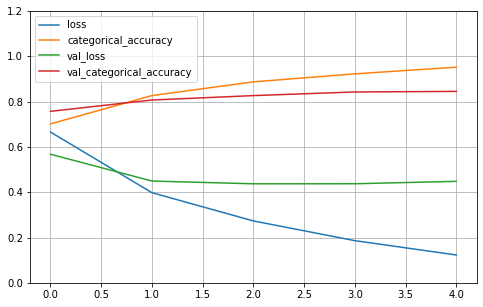

In [57]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.2)
plt.show()

In [58]:
model.save("POLYGON.h5")

In [59]:
model.evaluate(val_data)

63/63 [==============================] - 7s 118ms/step - loss: 0.4480 - categorical_accuracy: 0.8450


[0.44798192381858826, 0.8450000286102295]